In [2]:

#This comment is to add the code to my branch

import pandas as pd

import os  # Import os to work with environment variables

# Get the file path from the DATA_PATH environment variable
data_path = os.getenv("DATA_PATH", "/Users/raylu/Desktop/Courses/MGTSC 645/FInal Project")  # Adjust default path if needed

# Combine the directory with the filename
file_path = os.path.join(data_path, "superstore.csv")

# Load the dataset
df = pd.read_csv(file_path, encoding='latin1')

# Replace spaces with underscores, convert to lowercase, remove hyphens and strip extra whitespaces
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '_').str.lower().str.strip()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset info
print("\nDataset Info (Before Cleaning):")
print(df.info())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()

# Check for missing values **(but do not fill them)**
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Convert columns to correct data types
date_columns = ['order_date', 'ship_date']  # Modify if needed
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop columns that are useless for analysis (modify this list as needed)
columns_to_drop = ['row_id', 'postal_code']  # Example: Remove identifiers that are not useful
df = df.drop(columns=columns_to_drop, errors='ignore')

# Ensure correct data types
print("\nUpdated Data Types:")
print(df.dtypes)






First 5 rows of the dataset:
   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     customer_name    segment        country             city  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  postal_code  region       product_id         category sub_cat

In [6]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.245101,2.225110,0.206452,234.260108


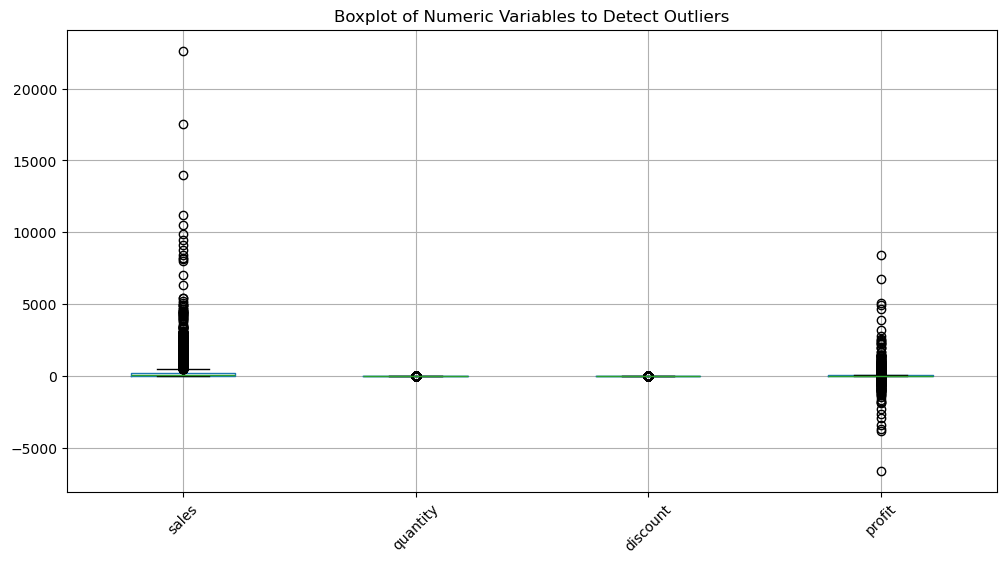

sales: 1167 outliers detected
quantity: 170 outliers detected
discount: 856 outliers detected
profit: 1881 outliers detected


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Numeric Variables to Detect Outliers")
plt.show()

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(df, numeric_cols)

# Print number of outliers per column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers detected")

# If you want to remove outliers, you can use:
# df_cleaned = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]